In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
#https://www.kaggle.com/rakannimer/air-passengers

In [2]:
df=pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
df.columns = ['Month', 'Passengers']
df = df.set_index('Month')
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
df.columns

Index(['Passengers'], dtype='object')

In [5]:
df.shape

(144, 1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [7]:
df.isnull().sum()

Passengers    0
dtype: int64

In [9]:
def df_values(df):
    for i in range(0, len(df.columns)):
        print('----------', df.columns[i], '---------')
        print (df.iloc[:,i].value_counts())
        print ('----------', df.columns[i], '---------- \n')
df_values(df) 

---------- Passengers ---------
229    3
306    2
405    2
242    2
196    2
      ..
191    1
209    1
230    1
218    1
432    1
Name: Passengers, Length: 118, dtype: int64
---------- Passengers ---------- 



<AxesSubplot:xlabel='Month'>

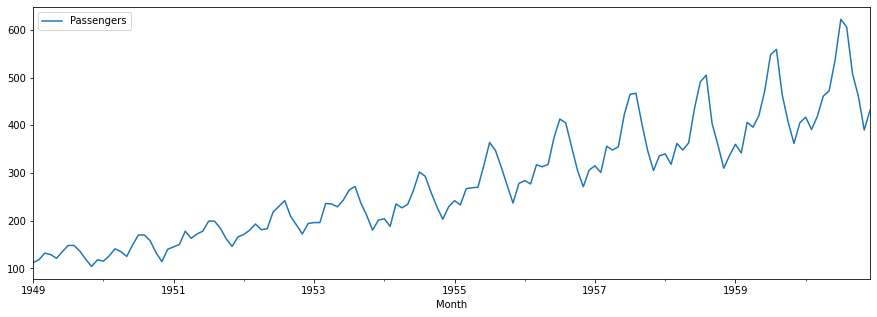

In [10]:
# plot
df.plot(figsize=(15,5))

C:\Users\eddie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


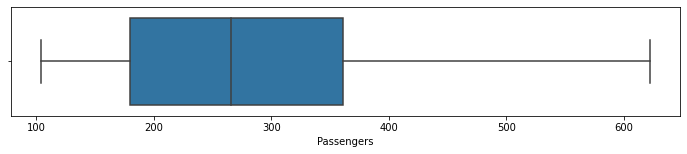

In [11]:
# outliers
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(df['Passengers'], whis=1.5)    #whis 1.5 is better 

C:\Users\eddie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


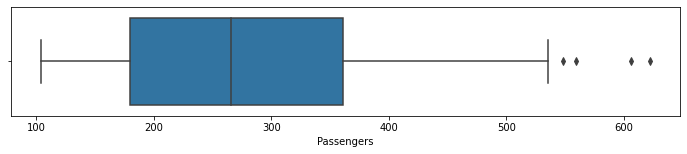

In [12]:
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(df['Passengers'], whis=1)

<AxesSubplot:>

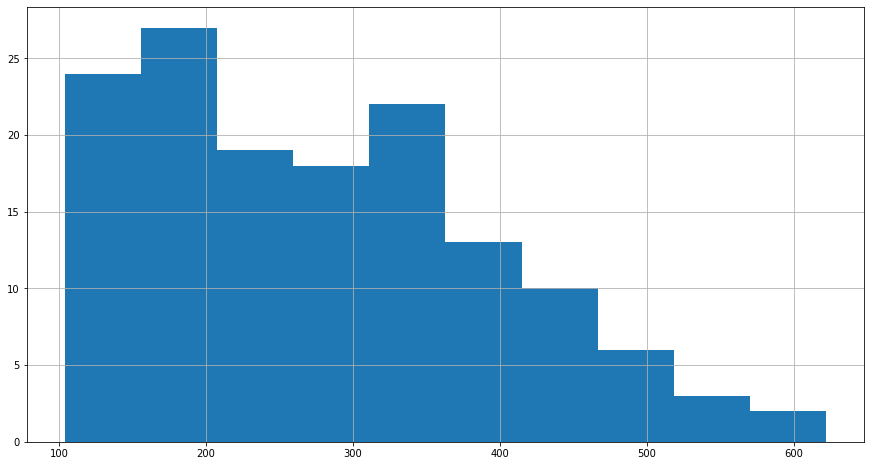

In [14]:
# histogram
df['Passengers'].hist(figsize=(15,8))

# seasonal decompose

<AxesSubplot:xlabel='Month'>

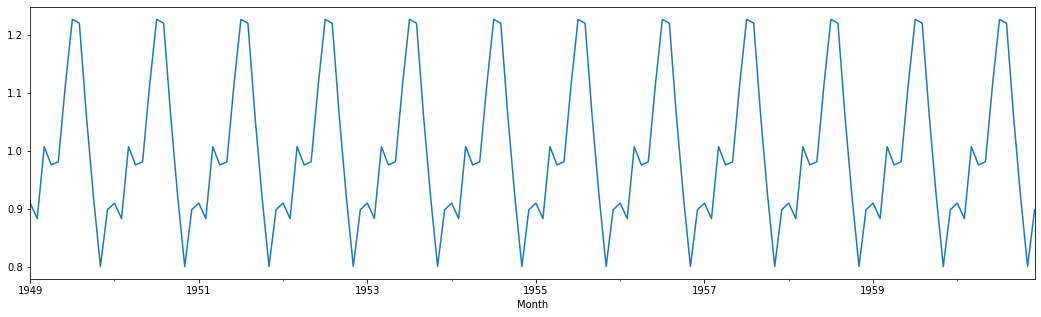

In [21]:
from pylab import rcParams
rcParams['figure.figsize'] = 18,5
result=seasonal_decompose(df['Passengers'],  model='multiplicable')   #12 months = multiplicable model
result.seasonal.plot()

<AxesSubplot:xlabel='Month'>

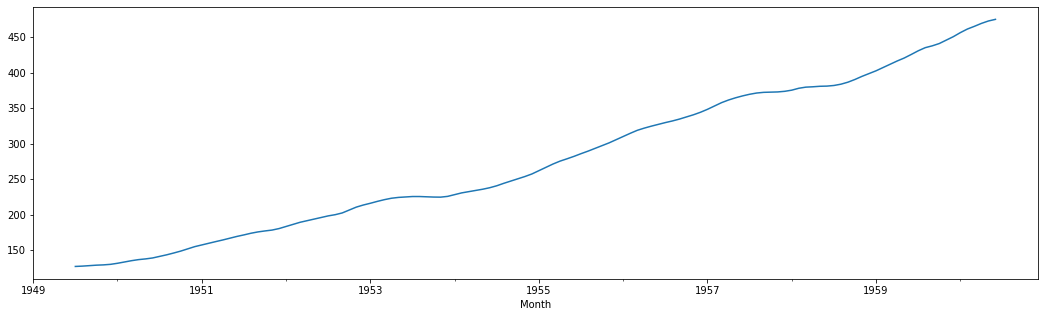

In [22]:
result.trend.plot()

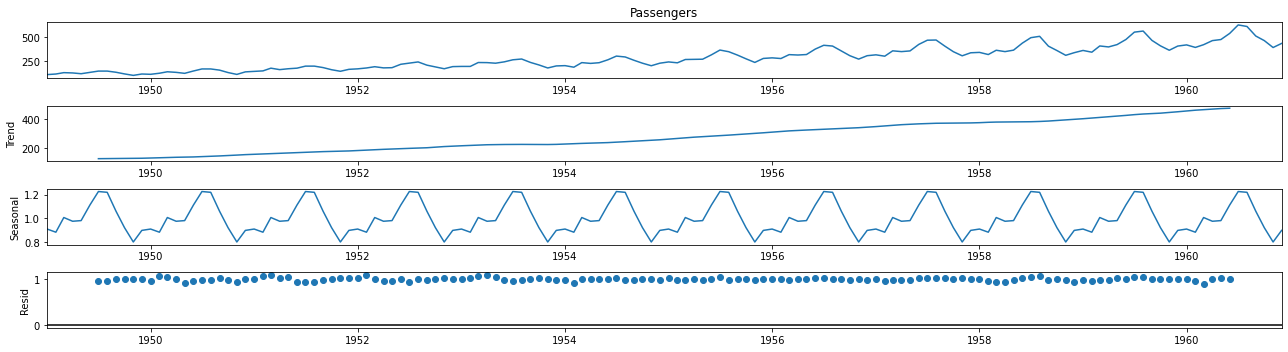

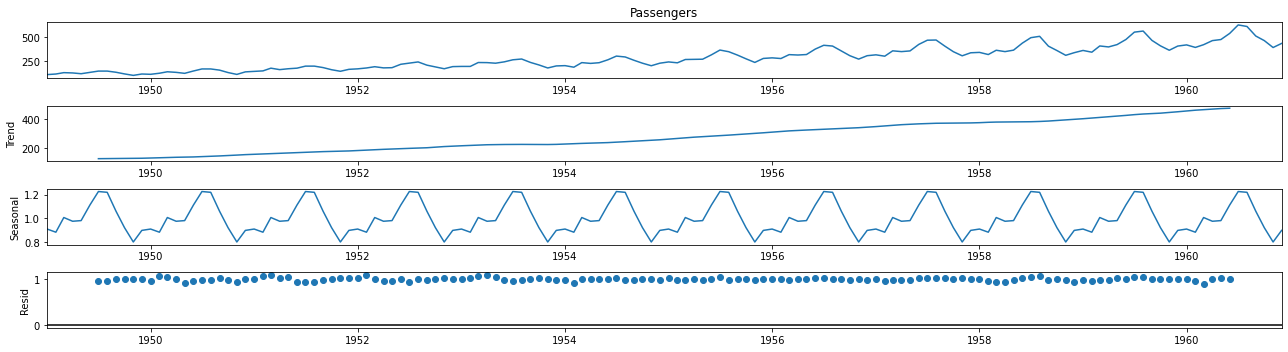

In [23]:
result.plot()

In [ ]:
# trend = we can see that the time series in increasing over time 
# seasonal = shows us the periodic signal over time 
# resid (noise) = shows us the variability in the data that can't be shown in the model

# building the forecast

In [24]:
#train test split
train_len = 120
train = df[0:train_len]

# only 1959-1960 data
test = df[train_len:]

In [25]:
train.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [26]:
test.head()

,Passengers
Month,
1959-01-01,360
1959-02-01,342
1959-03-01,406
1959-04-01,396
1959-05-01,420


# average forecast

In [29]:
forecast_avg = test.copy()

In [30]:
forecast_avg['avg_forecast'] = train['Passengers'].mean()
forecast_avg.head()

,Passengers,avg_forecast
Month,,
1959-01-01,360,245.908333
1959-02-01,342,245.908333
1959-03-01,406,245.908333
1959-04-01,396,245.908333
1959-05-01,420,245.908333


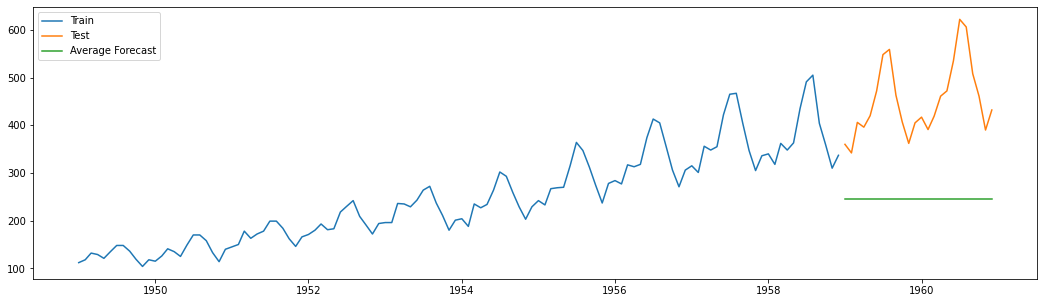

In [33]:
plt.figure(figsize=(18,5))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(forecast_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

# RMSE error

In [38]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Passengers'], forecast_avg['avg_forecast'])).round(2)
print('RMSE error is:',rmse)

RMSE error is: 219.44


# Simple moving average

In [39]:
forcast_sma = df.copy()

In [40]:
moving_avg_window = 12

In [41]:
# rolling
forcast_sma['sma_forecast'] = df['Passengers'].rolling(moving_avg_window).mean()

In [42]:
forcast_sma['sma_forecast'][train_len:] = forcast_sma['sma_forecast'][train_len-1]

C:\Users\eddie\AppData\Local\Temp/ipykernel_3696/300579172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forcast_sma['sma_forecast'][train_len:] = forcast_sma['sma_forecast'][train_len-1]


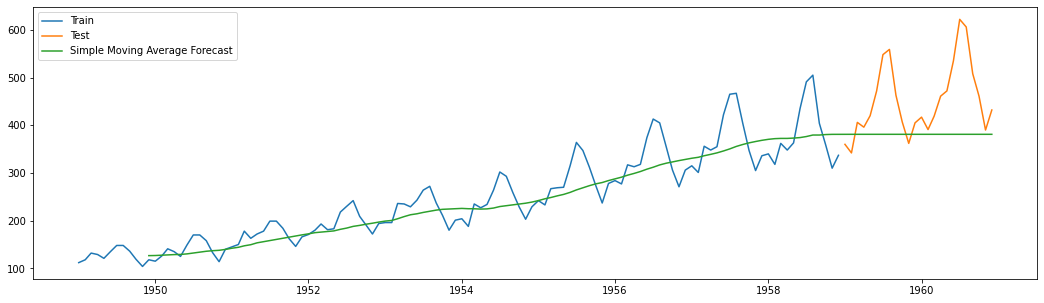

In [44]:
plt.figure(figsize=(18,5))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(forcast_sma['sma_forecast'], label='Simple Moving Average Forecast')
plt.legend(loc='best')
plt.show()

# RMSE

In [45]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], forcast_sma['sma_forecast'][train_len:])).round(2)
print('RMSE error is:',rmse)

RMSE error is: 103.21


# Let's try a shorter window of 6 months instead of 12

C:\Users\eddie\AppData\Local\Temp/ipykernel_3696/3614790024.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forcast_sma['sma_forecast'][train_len:] = forcast_sma['sma_forecast'][train_len-1]


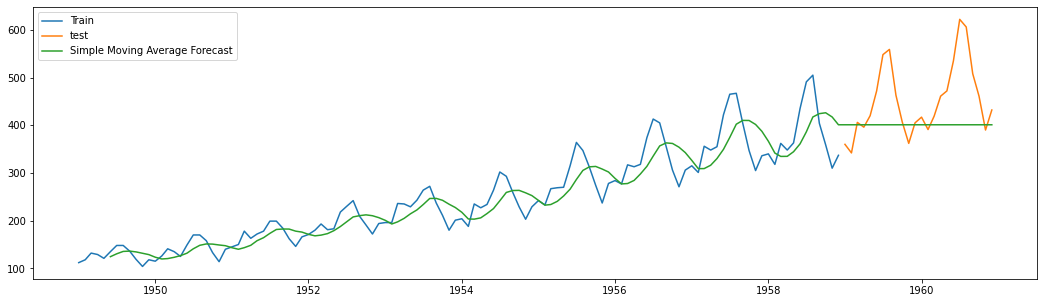

In [47]:
ma_window = 6
forcast_sma['sma_forecast'] = df['Passengers'].rolling(ma_window).mean()
forcast_sma['sma_forecast'][train_len:] = forcast_sma['sma_forecast'][train_len-1]
plt.figure(figsize=(18,5))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(forcast_sma['sma_forecast'], label='Simple Moving Average Forecast')
plt.legend(loc='best')
plt.show()

# Let's try with 3 months

C:\Users\eddie\AppData\Local\Temp/ipykernel_3696/878526398.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forcast_sma['sma_forecast'][train_len:] = forcast_sma['sma_forecast'][train_len-1]


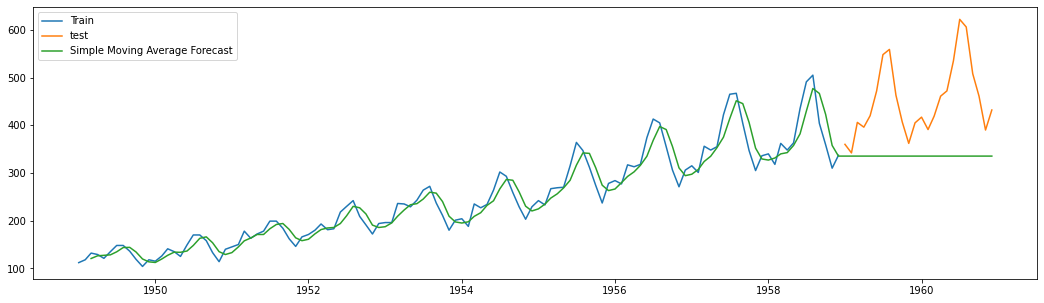

In [48]:
ma_window = 3
forcast_sma['sma_forecast'] = df['Passengers'].rolling(ma_window).mean()
forcast_sma['sma_forecast'][train_len:] = forcast_sma['sma_forecast'][train_len-1]
plt.figure(figsize=(18,5))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(forcast_sma['sma_forecast'], label='Simple Moving Average Forecast')
plt.legend(loc='best')
plt.show()

# Holt's Exponential Smoothing method -captures both Level and Trend


In [49]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [50]:
model = ExponentialSmoothing(np.asarray(train['Passengers']), seasonal_periods = 12, trend='additive', seasonal=None)

In [51]:
model_fit = model.fit(smoothing_level = 0.2, smoothing_slope = 0.01, optimized=False)
model_fit.params

C:\Users\eddie\AppData\Local\Temp/ipykernel_3696/2339038356.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_fit = model.fit(smoothing_level = 0.2, smoothing_slope = 0.01, optimized=False)


{'smoothing_level': 0.2,
 'smoothing_trend': 0.01,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 118.46666666666661,
 'initial_trend': 2.0606060606060677,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [52]:
holt = test.copy()
# forecasting for next 24 months
holt['holt_forecast'] = model_fit.forecast(24)

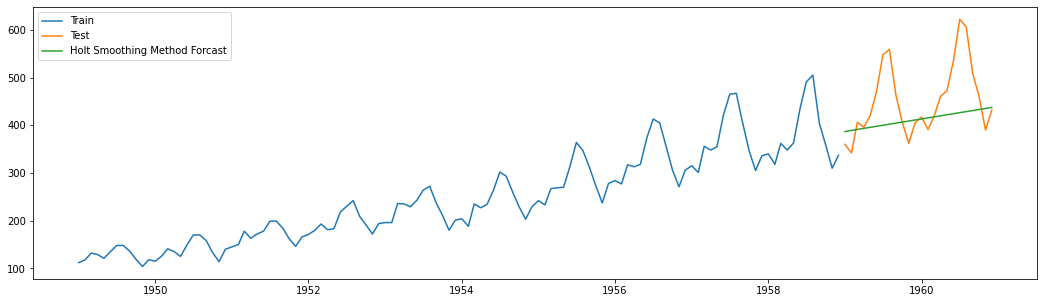

In [54]:
plt.figure(figsize=(18,5))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(holt['holt_forecast'], label='Holt Smoothing Method Forcast')
plt.legend(loc='best')
plt.show()

# RMSE

In [56]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], holt['holt_forecast'])).round(2)
print('RMSE error is:',rmse)

RMSE error is: 80.9


# Holt-Winters's Exponential Smoothing

In [57]:
holt_win = test.copy()

In [58]:
model = ExponentialSmoothing(np.asarray(train['Passengers']), seasonal_periods = 12, trend='additive', seasonal='additive')

In [59]:
model_fit = model.fit(optimized=True)

In [60]:
model_fit.params

{'smoothing_level': 0.23678678235712566,
 'smoothing_trend': 1.8055668382578714e-09,
 'smoothing_seasonal': 0.7632132086415252,
 'damping_trend': nan,
 'initial_level': 119.1876680939318,
 'initial_trend': 2.2768394955266533,
 'initial_seasons': array([ -9.42424719,  -3.87104168,   8.69002781,   3.6678027 ,
         -4.94701962,   9.26652064,  21.53444859,  19.2001798 ,
          5.07181472, -13.80997707, -28.51179942, -12.37245268]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [61]:
# Forecast for last 24 months
holt_win['hwa_forecast'] = model_fit.forecast(24)

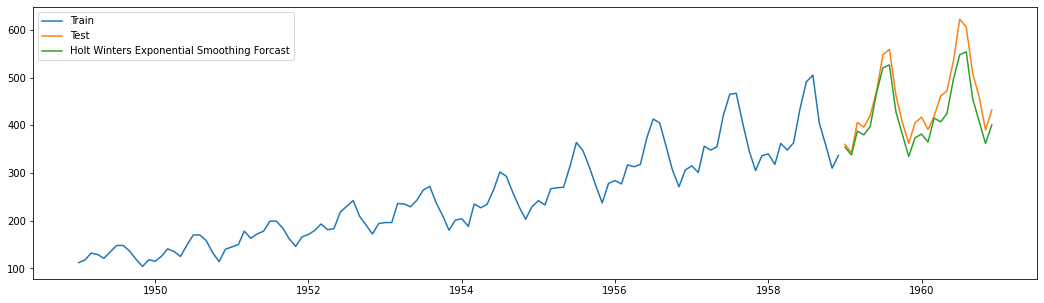

In [62]:
plt.figure(figsize=(18,5))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(holt_win['hwa_forecast'], label='Holt Winters Exponential Smoothing Forcast')
plt.legend(loc='best')
plt.show()

# RMSE

In [63]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], holt_win['hwa_forecast'])).round(2)
print('RMSE error is:',rmse)

RMSE error is: 35.76


# Converting Non-Stationary to Stationary

In [66]:
from scipy.stats import boxcox

In [67]:
df_boxcox = pd.Series(boxcox(df['Passengers'], lmbda=0), df.index)
df_boxcox.head()

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
dtype: float64

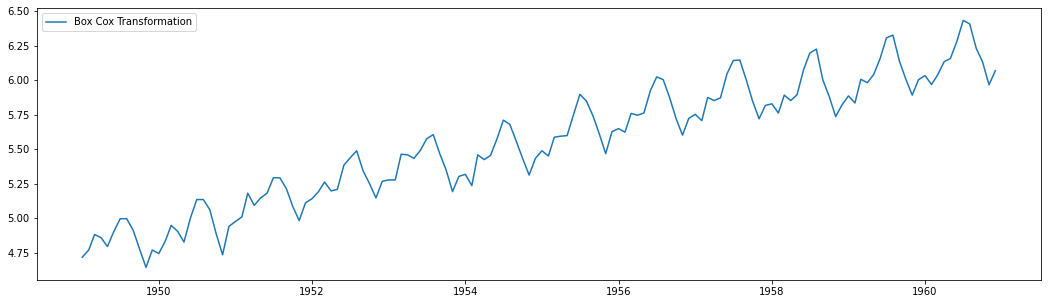

In [69]:
plt.figure(figsize=(18,5))
plt.plot(df_boxcox, label='Box Cox Transformation')
plt.legend(loc='best')
plt.show()

# We need differencing to make the mean constant

In [70]:
df_boxcox_differencing = pd.Series(df_boxcox - df_boxcox.shift(), index=df.index)

In [71]:
# remove first
df_boxcox_differencing.dropna(inplace=True)

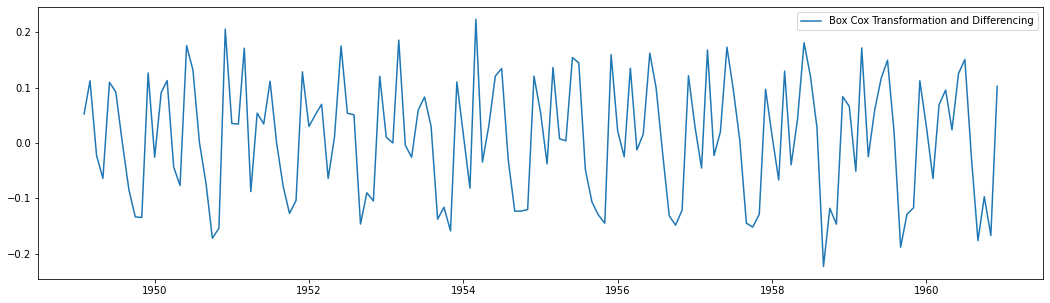

In [72]:
plt.figure(figsize=(18,5))
plt.plot(df_boxcox_differencing, label='Box Cox Transformation and Differencing')
plt.legend(loc='best')
plt.show()

# test with ADF #https://www.statology.org/dickey-fuller-test-python/

In [74]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_boxcox_differencing)
adf_test

(-2.717130598388118,
 0.07112054815086118,
 14,
 128,
 {'1%': -3.4825006939887997,
  '5%': -2.884397984161377,
  '10%': -2.578960197753906},
 -440.35846985568105)

# Results = P value is low, therefore we reject H0

In [75]:
print('ADF stats: %f' % adf_test[0])
print('p-value: %f' %adf_test[1])
print('Critical value @ 0.05: %.2f' % adf_test[4]['5%'])

ADF stats: -2.717131
p-value: 0.071121
Critical value @ 0.05: -2.88


# Autocorrelation captures both direct and indirect relationships

In [76]:
from statsmodels.graphics.tsaplots import plot_acf

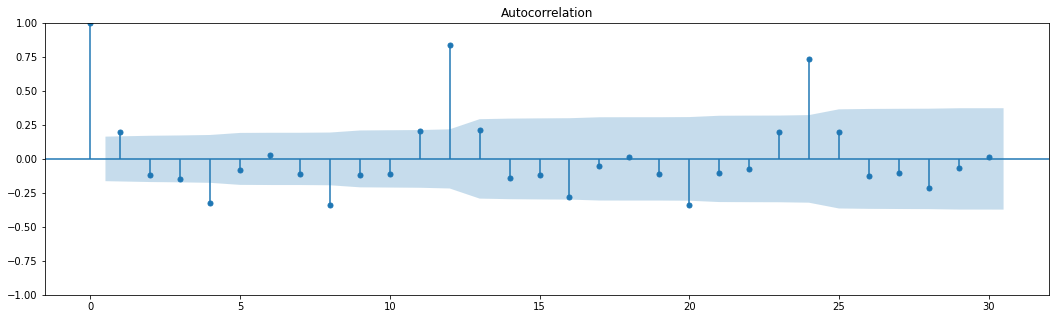

In [78]:
plt.figure(figsize=(18,5))
plot_acf(df_boxcox_differencing, ax=plt.gca(), lags=30)
plt.show()

# Let's Build a regression model

In [79]:
# split df_boxcox
train_boxcox = df_boxcox[:train_len]
test_boxcox = df_boxcox[train_len:]

In [80]:
# drop first
train_boxcox_differencing = df_boxcox_differencing[:train_len-1]
test_boxcox_differencing = df_boxcox_differencing[train_len-1:]

In [85]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_boxcox_differencing, order=(1,0,0))

C:\Users\eddie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\eddie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\eddie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [86]:
model_fit = model.fit()
model_fit.params

const     0.009473
ar.L1     0.182911
sigma2    0.010733
dtype: float64

In [87]:
AR_forecast = df_boxcox_differencing.copy()

In [88]:
# take all of the timestamps
AR_forecast['ar_forecast_boxcox_differencing'] = model_fit.predict(df_boxcox_differencing.index.min(), df_boxcox_differencing.index.max())

In [89]:
# transform the converted time series back to original
AR_forecast['ar_forecast_boxcox'] = AR_forecast['ar_forecast_boxcox_differencing'].cumsum()

In [90]:
# add the first one back
AR_forecast['ar_forecast_boxcox'] = AR_forecast['ar_forecast_boxcox'].add(df_boxcox[0])

In [91]:
# reverse transform
AR_forecast['ar_forecast'] = np.exp(AR_forecast['ar_forecast_boxcox'])

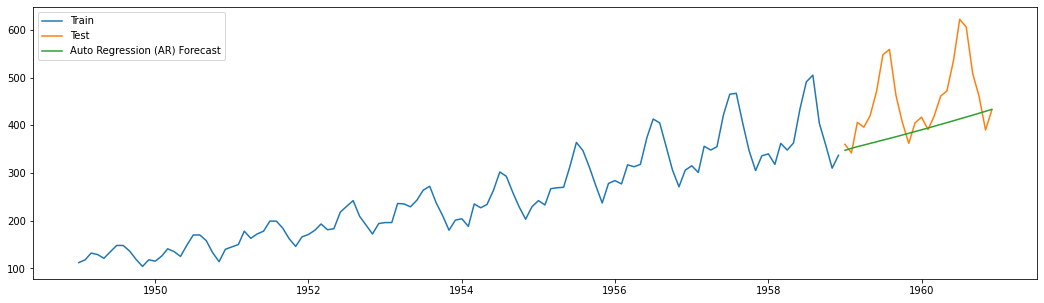

In [93]:
plt.figure(figsize=(18,5))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(AR_forecast['ar_forecast'][test.index.min():], label='Auto Regression (AR) Forecast')
plt.legend(loc='best')
plt.show()

# RMSE

In [94]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], AR_forecast['ar_forecast'][test.index.min():])).round(2)
print('RMSE error is:',rmse)

RMSE error is: 93.42


# Let's try the Moving Average (MA) model

In [95]:
model = ARIMA(train_boxcox_differencing, order=(0,0,1))

C:\Users\eddie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\eddie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\eddie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [96]:
model_fit = model.fit()
model_fit.params

const     0.009523
ma.L1     0.258490
sigma2    0.010579
dtype: float64

In [97]:
forecast_MA = df_boxcox_differencing.copy()

In [98]:
forecast_MA['ma_forecast_boxcox_diff'] = model_fit.predict(df_boxcox_differencing.index.min(), df_boxcox_differencing.index.max())

In [99]:
# recover original 
forecast_MA['ma_forecast_boxcox'] = forecast_MA['ma_forecast_boxcox_diff'].cumsum()

In [100]:
# add the first one
forecast_MA['ma_forecast_boxcox'] = forecast_MA['ma_forecast_boxcox'].add(df_boxcox[0])

In [101]:
# remove transformation
forecast_MA['ma_forecast'] = np.exp(forecast_MA['ma_forecast_boxcox'])

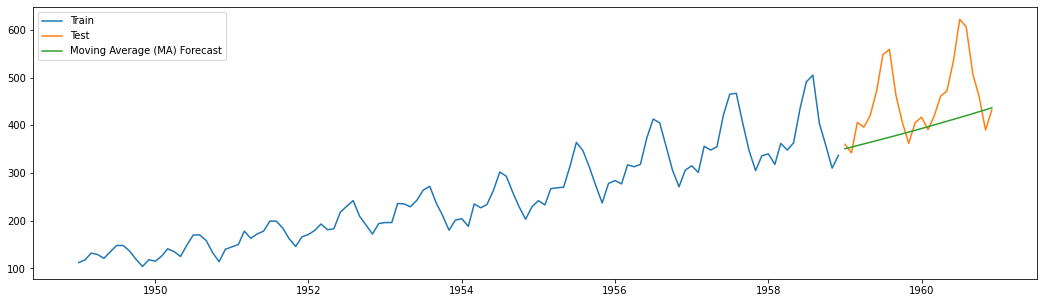

In [103]:
plt.figure(figsize=(18,5))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(forecast_MA['ma_forecast'][test.index.min():], label='Moving Average (MA) Forecast')
plt.legend(loc='best')
plt.show()

# RMSE

In [105]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], forecast_MA['ma_forecast'][test.index.min():])).round(2)
print('RMSE error is:',rmse)

RMSE error is: 91.61


# Almost the same RMSE error as the AR, let's try the Auto Regressive Moving Average (ARMA) model which combines both

In [106]:
model = ARIMA(train_boxcox_differencing, order=(1,0,1))

C:\Users\eddie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\eddie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\eddie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [107]:
model_fit = model.fit()
model_fit.params

const     0.009628
ar.L1    -0.581788
ma.L1     0.837584
sigma2    0.010129
dtype: float64

In [108]:
forecast_ARMA = df_boxcox_differencing.copy()

In [110]:
forecast_ARMA['arma_forecast_boxcox_diff'] = model_fit.predict(df_boxcox_differencing.index.min(), df_boxcox_differencing.index.max())

In [111]:
forecast_ARMA['arma_forecast_boxcox'] = forecast_ARMA['arma_forecast_boxcox_diff'].cumsum()

In [112]:
forecast_ARMA['arma_forecast_boxcox'] = forecast_ARMA['arma_forecast_boxcox'].add(df_boxcox[0])

In [113]:
# redo the transformation same as before 
forecast_ARMA['arma_forecast'] = np.exp(forecast_ARMA['arma_forecast_boxcox'])

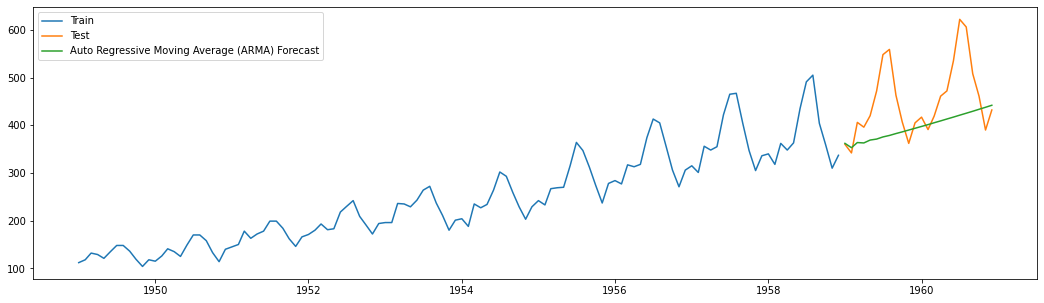

In [114]:
plt.figure(figsize=(18,5))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(forecast_ARMA['arma_forecast'][test.index.min():], label='Auto Regressive Moving Average (ARMA) Forecast')
plt.legend(loc='best')
plt.show()

# RMSE

In [115]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], forecast_ARMA['arma_forecast'][test.index.min():])).round(2)
print('RMSE error is:',rmse)

RMSE error is: 88.74


# Slightly better than AR and MA but still does not capture any seasonality like the Holt model